# KNN

In [1]:
from sklearn.decomposition import PCA
import csv
import random
import math
import operator
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pylab as pl

C:\Users\erika\Anac\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#read data
df = pd.read_csv('./data/joinedData.csv', sep=r'\s*(?:\||\#|\,)\s*',
                 engine='python')

In [3]:
df.describe()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,400.000000,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,231.373075,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,200.000000,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,400.000000,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,600.000000,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,800.000000,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [4]:
#change the 5 tumour types to numbers
Class = {'LUAD': 0,'BRCA': 1,'KIRC': 2,'PRAD': 3,'COAD': 4} 

#this is where we add the class to the table
df.Class = [Class[item] for item in df.Class]

#drop the 2 unnamed table because we do not need them
df = df.drop('Unnamed: 0',1)
df = df.drop('Unnamed: 0.1',1)
df

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,3,0.000000,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.000000,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0,0.000000,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,3,0.000000,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,3,0.000000,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.000000,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,1,0.000000,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
5,3,0.000000,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.000000,...,5.726657,8.602588,9.928339,6.096154,9.816001,11.556995,9.244150,9.836473,5.355133,0.000000
6,2,0.000000,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.000000,...,5.105904,7.927968,9.673966,1.877744,9.802692,13.256060,9.664486,9.244219,8.330912,0.000000
7,3,0.000000,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.000000,...,5.297833,8.277092,9.599230,5.244290,9.994339,12.670377,9.987733,9.216872,6.551490,0.000000
8,1,0.000000,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.000000,...,6.721974,9.597533,9.763753,7.933278,10.952880,12.498919,10.389954,10.390255,7.828321,0.000000
9,3,0.000000,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.000000,...,6.020051,8.712809,10.259096,6.131583,9.923582,11.144295,9.244851,9.484299,4.759151,0.000000


In [5]:
#Split the X and y
X = df.drop('Class', axis=1).values
y = df['Class'].values
y = np.asarray(y)

#Standarize using min and max
X = (X - X.mean()) / (X.max() - X.min())

#Split the data set with 80 to traina dn20 to test




array([[-0.31009073, -0.09820705, -0.1191201 , ...,  0.15478354,
         0.06082329, -0.27915791],
       [-0.31009073, -0.15494648, -0.16439002, ...,  0.16707395,
        -0.11995828, -0.31009073],
       [-0.31009073, -0.26335689, -0.19595597, ...,  0.12696557,
        -0.13028876, -0.31009073],
       ...,
       [-0.31009073, -0.24609783, -0.14901608, ...,  0.14955114,
        -0.06368692, -0.28537853],
       [-0.31009073, -0.14907001, -0.11465066, ...,  0.16131226,
         0.08989041, -0.31009073],
       [-0.27121621, -0.21817193, -0.17256983, ...,  0.15414783,
        -0.01287398, -0.31009073]])

In [6]:
#using k=n^(1/2) where n = columns, therefore it's 143.2 
K = 143

In [7]:
clf = KNeighborsClassifier(n_neighbors=K, weights='distance')

In [8]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=143, p=2,
           weights='distance')

In [9]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9875776397515528


In [10]:
##Predict
df2 = df.drop('Class',1)
test = df2.iloc[[800]]
test

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
800,0.0,2.325242,3.805932,6.530246,9.560367,0.0,7.957027,0.0,0.0,0.0,...,6.403075,8.594354,10.243079,9.139459,10.102934,11.641081,10.607358,9.844794,4.550716,0.0


In [11]:
print ("The test is: ")
print(clf.predict(test))

The test is: 
[3]


In [12]:
print ("The right answer is: ")
check = df.iloc[[800]]
check

The right answer is: 


,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
800,3,0.0,2.325242,3.805932,6.530246,9.560367,0.0,7.957027,0.0,0.0,...,6.403075,8.594354,10.243079,9.139459,10.102934,11.641081,10.607358,9.844794,4.550716,0.0


In [13]:
pca = PCA(n_components=2).fit(X_train)
pcaX_train = pca.transform(X_train)

In [14]:
h = .02 # step size in the mesh

# the color maps
cmap_light = ListedColormap(['#DDA0DD', '#FFFF00','#40E0D0','#DC143C','#7CFC00'])
clf.fit(pca_2d, y_train)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = pcaX_train[:,0].min() - 1, pcaX_train[:,0].max() + 1
y_min, y_max = pcaX_train[:,1].min() - 1, pcaX_train[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [15]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

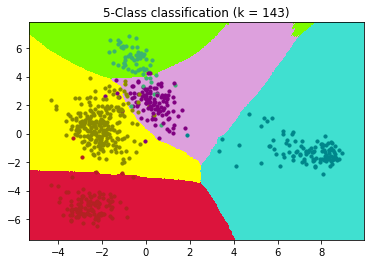

In [16]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

for i in range(0, pcaX_train.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pcaX_train[i,0],pcaX_train[i,1],c='#800080',s=10)
    elif y_train[i] == 1:
        c2 = pl.scatter(pcaX_train[i,0],pcaX_train[i,1],c='#8B8B00',s=10)
    elif y_train[i] == 2:
        c3 = pl.scatter(pcaX_train[i,0],pcaX_train[i,1],c='#00868B',s=10)
    elif y_train[i] == 3:
        c4 = pl.scatter(pcaX_train[i,0],pcaX_train[i,1],c='#B22222',s=10)
    elif y_train[i] == 4:
        c5 = pl.scatter(pcaX_train[i,0],pcaX_train[i,1],c='#3CB371',s=10)

# Plot also the training points
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("5-Class classification (k = %i)" % (K))
plt.show()

### References 
#### The code was obtained by using sklearn
#### http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

### References in Vancouver
#### 1. sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.1 documentation [Internet]. Scikit-learn.org. [cited 4 December 2018]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#### 2. sklearn.decomposition.PCA — scikit-learn 0.20.1 documentation [Internet]. Scikit-learn.org. [cited 4 December 2018]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#### 3. KNN (k-nearest neighbors) classification example — scikit-learn 0.11-git documentation [Internet]. Ogrisel.github.io. [cited 4 December 2018]. Available from: http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html